In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from layers import MultiLayerNet

In [61]:
def make_one(x):
    if x.ndim == 1:
        t = np.zeros((x.size,np.unique(x).size))
        for i in range(t.shape[0]):
            t[i,x[i]] = 1
    return t

In [131]:
# mnist = fetch_openml('mnist_784')

In [115]:
X = mnist.data
y = mnist.target

X = X.astype(np.float32).values/255. # minmax scale
y = y.astype(np.int32).values
y = make_one(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=.5)

In [66]:
X_train.shape, X_test.shape, X_val.shape

((42000, 784), (14000, 784), (14000, 784))

In [67]:
y_train.shape, y_test.shape, y_val.shape

((42000, 10), (14000, 10), (14000, 10))

In [116]:
input_size = X_train.shape[1]
hidden_size = [100,256,100]
output_size = y_train.shape[1]

In [21]:
model = MultiLayerNet(input_size,hidden_size,output_size)

In [12]:
grads = model.gradient(X_train,y_train)

In [13]:
grads

{'W1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': array([ 3.06336898e-03,  4.71141870e-03,  1.50200834e-02,  2.00636122e-02,
        -2.61833377e-03,  6.80767186e-03,  0.00000000e+00,  1.01640263e-02,
        -9.41309595e-03,  2.55148924e-03,  1.00343148e-02,  1.94395361e-02,
         0.00000000e+00,  1.03419269e-02,  1.02408458e-02,  1.51471466e-02,
         1.26579183e-05,  0.00000000e+00, -2.05961572e-04,  1.96709217e-02,
        -1.66248695e-03,  1.31981536e-02,  1.18102922e-02,  3.60155146e-03,
        -4.76058676e-04,  2.65555538e-02,  2.78806967e-03,  9.43365009e-03,
         1.57281683e-02,  1.25124806e-24,  1.85832889e-03, -6.27324340e-03,
        -2.12383352e-02, -6.14378361e-05,  2.14779286e-02,  4.07107477e-03,
         7.21630807e-03,  2.80030885e-03,  1.52054190e-

In [11]:
epochs = 100
lr = 1e-2

model.fit(X_train,y_train,epochs,lr,batch_size)

epoch:0, loss:12.84, acc:0.203
epoch:1, loss:13.743, acc:0.147
epoch:2, loss:14.036, acc:0.129
epoch:3, loss:13.834, acc:0.138
epoch:4, loss:13.5, acc:0.157
epoch:5, loss:12.764, acc:0.196
epoch:6, loss:12.377, acc:0.217
epoch:7, loss:12.129, acc:0.23
epoch:8, loss:11.95, acc:0.238
epoch:9, loss:11.766, acc:0.247
epoch:10, loss:11.626, acc:0.253
epoch:11, loss:11.498, acc:0.257
epoch:12, loss:11.397, acc:0.26
epoch:13, loss:11.303, acc:0.262
epoch:14, loss:11.143, acc:0.261
epoch:15, loss:10.954, acc:0.257
epoch:16, loss:10.679, acc:0.253
epoch:17, loss:10.359, acc:0.25
epoch:18, loss:9.936, acc:0.246
epoch:19, loss:9.44, acc:0.241
epoch:20, loss:8.843, acc:0.237
epoch:21, loss:8.216, acc:0.232
epoch:22, loss:7.589, acc:0.227
epoch:23, loss:7.021, acc:0.219
epoch:24, loss:6.5, acc:0.215
epoch:25, loss:6.042, acc:0.209
epoch:26, loss:5.656, acc:0.203
epoch:27, loss:5.32, acc:0.197
epoch:28, loss:5.043, acc:0.19
epoch:29, loss:4.813, acc:0.184
epoch:30, loss:4.609, acc:0.178
epoch:31, lo

In [3]:
import numpy as np
from loss import *
from activation import *
from gradient import *
from collections import OrderedDict
from layers import *

In [229]:
class MultiLayer:
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.hidden_size.insert(0,self.input_size)
        self.hidden_size.append(self.output_size)
        self.W = {}
        for i in range(len(hidden_size)-1):
            w_key = 'W'+str(i+1)
            b_key = 'b'+str(i+1)
            self.W[w_key] = np.random.randn(hidden_size[i],hidden_size[i+1])
            self.W[b_key] = np.random.randn(hidden_size[i+1])
            
        self.layers = OrderedDict()
        
        for i in range(int(len(self.W)/2-1)):
            j = i*2 
            key1 = 'Affine'+str(i+1)
            key2 = 'Relu'+str(i+1)
            w = list(self.W.keys())[j]
            b = list(self.W.keys())[j+1]
            self.layers[key1] = Affine(self.W[w],self.W[b])
            self.layers[key2] = Relu()
        
        last_num = str(int(len(self.W)/2))
        self.layers['Affine'+last_num] = Affine(self.W['W'+last_num],self.W['b'+last_num])
        self.Lastlayer = SoftmaxWithLoss()
        self.loss_val = []
        self.acc_val = []
    
    #def summary(self):
        
    
    def predict(self,x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self,x,t):
        y = self.predict(x)
        loss = self.Lastlayer.forward(y,t)
        return loss

    def gradient(self,x,t):
        self.loss(x,t)
        dout = 1
        dout = self.Lastlayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        grads = {}
        layer_number = int(len(self.layers.keys())/2)
        
        for i in range(1,layer_number):
            grads['W'+str(i)] = self.layers['Affine'+str(i)].dW
            grads['b'+str(i)] = self.layers['Affine'+str(i)].db
            
        return grads
    
    def accuracy(self,x,t):
        y = np.argmax(self.predict(x),axis=1)
        t = np.argmax(t, axis=1)
        acc = np.sum(y==t)/y.size
        return acc
            
    
    def fit(self,epochs,batch_size,lr,x,t,x_val,t_val):
        if divmod(x.shape[0],batch_size)[1] > 0:
            batch = divmod(x.shape[0],batch_size)[0] + 1
        else:
            batch = divmod(x.shape[0],batch_size)[0]
        for epoch in range(epochs):
            if epoch == 0:
                start = 0
            end = start + batch_size
            if epoch == epochs-1 and divmod(x.shape[0],batch_size)[1] != 0:
                end = start+divmod(x.shape[0],batch_size)[1]
            x_tmp = x[start:end,:]
            t_tmp = t[start:end,:]
            start = end
            for i in range(batch):
                grads = self.gradient(x_tmp,t_tmp)
            for key in grads.keys():
                self.W[key] -=  lr*grads[key]
            if epoch % 20 == 0:
                print("epoch ",epoch,":val_loss===========",self.loss(x_val,t_val),"val_acc:========",self.accuracy(x_val,t_val))
                self.loss_val.append(self.loss(x_val,t_val))
                self.acc_val.append(np.round(self.accuracy(x_val,t_val),2))
                
    def fit_gd(self,epochs,batch_size,lr,x,t,x_val,t_val):
        for epoch in range(epochs):
            grads = self.gradient(x,t)
            for key in grads.keys():
                self.W[key] -= lr*grads[key]
            if epoch % 20 == 0:
                print("epoch ",epoch,":val_loss===========",self.loss(x_val,t_val),"val_acc:========",self.accuracy(x_val,t_val))
                self.loss_val.append(self.loss(x_val,t_val))
                self.acc_val.append(np.round(self.accuracy(x_val,t_val),2))

In [152]:
def fit(self,epochs,batch_size,lr,x,t,x_val,t_val):
        if divmod(x.shape[0],batch_size)[1] > 0:
            batch = divmod(x.shape[0],batch_size)[0] + 1
        else:
            batch = divmod(x.shape[0],batch_size)[0]
        for epoch in range(epochs):
            if epoch == 0:
                start = 0
            end = start + batch_size
            if epoch == epochs-1 and divmod(x.shape[0],batch_size)[1] != 0:
                end = start + divmod(x.shape[0],batch_size)[1]
            x = x[start:end,:]
            t = t[start:end,:]
            start = end
            for i in range(batch_size):
                grads = self.gradient(x,t)
            for key in grads.keys():
                self.W[key] -=  lr*grads[key]
            print("epoch ",epoch,":val_loss===========",self.loss(x_val,t_val),"val_acc:========",self.accuracy(x_val,t_val))
            self.loss_val.append(self.loss(x_val,t_val))
            self.acc_val.append(np.round(self.accuracy(x_val,t_val),2))

In [99]:
X.shape[0]
batch_size = 1001
if divmod(X.shape[0],batch_size)[1] > 0:
    epochs = divmod(X.shape[0],batch_size)[0] + 1
else:
    epochs = divmod(X.shape[0],batch_size)[0]
for epoch in range(epochs):
    if epoch == 0:
        start = 0
    end = start + batch_size
    
    if epoch == epochs-1 and divmod(X.shape[0],batch_size)[1] != 0:
        end = start + divmod(X.shape[0],batch_size)[1]
    print(epoch,start,end)
    start = end

0 0 1001
1 1001 2002
2 2002 3003
3 3003 4004
4 4004 5005
5 5005 6006
6 6006 7007
7 7007 8008
8 8008 9009
9 9009 10010
10 10010 11011
11 11011 12012
12 12012 13013
13 13013 14014
14 14014 15015
15 15015 16016
16 16016 17017
17 17017 18018
18 18018 19019
19 19019 20020
20 20020 21021
21 21021 22022
22 22022 23023
23 23023 24024
24 24024 25025
25 25025 26026
26 26026 27027
27 27027 28028
28 28028 29029
29 29029 30030
30 30030 31031
31 31031 32032
32 32032 33033
33 33033 34034
34 34034 35035
35 35035 36036
36 36036 37037
37 37037 38038
38 38038 39039
39 39039 40040
40 40040 41041
41 41041 42042
42 42042 43043
43 43043 44044
44 44044 45045
45 45045 46046
46 46046 47047
47 47047 48048
48 48048 49049
49 49049 50050
50 50050 51051
51 51051 52052
52 52052 53053
53 53053 54054
54 54054 55055
55 55055 56056
56 56056 57057
57 57057 58058
58 58058 59059
59 59059 60060
60 60060 61061
61 61061 62062
62 62062 63063
63 63063 64064
64 64064 65065
65 65065 66066
66 66066 67067
67 67067 68068
68 68068 690

In [131]:
# mnist = fetch_openml('mnist_784')

In [223]:
X = mnist.data
y = mnist.target

X = X.astype(np.float32).values/255. # minmax scale
y = y.astype(np.int32).values
y = make_one(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=.5)

In [224]:
input_size = X.shape[1]
hidden_size = [100,150]
output_size = y.shape[1]
model = MultiLayer(input_size,hidden_size,output_size)

In [225]:
epochs = 1000
lr = 1e-3
batch_size = 100
model.fit(epochs,batch_size,lr,X_train,y_train,X_val,y_val)

epoch  0 :val_loss=========== 15.025492332831782 val_acc:======== 0.06521428571428571
epoch  20 :val_loss=========== 14.600766981522721 val_acc:======== 0.08978571428571429
epoch  40 :val_loss=========== 14.137429619740665 val_acc:======== 0.11721428571428572
epoch  60 :val_loss=========== 13.550354001170515 val_acc:======== 0.15042857142857144
epoch  80 :val_loss=========== 12.982454836122386 val_acc:======== 0.18557142857142858


KeyboardInterrupt: 

In [230]:
epochs = 1000
lr = 1e-3
model.fit(epochs,batch_size,lr,X_train,y_train,X_val,y_val)

epoch  0 :val_loss=========== 12.675167192719416 val_acc:======== 0.2042857142857143
epoch  20 :val_loss=========== 12.172709286994179 val_acc:======== 0.23457142857142857
epoch  40 :val_loss=========== 11.705709711245484 val_acc:======== 0.26292857142857146
epoch  60 :val_loss=========== 11.216481984117783 val_acc:======== 0.2922142857142857
epoch  80 :val_loss=========== 10.806618237019316 val_acc:======== 0.3176428571428571
epoch  100 :val_loss=========== 10.447353237413562 val_acc:======== 0.3390714285714286
epoch  120 :val_loss=========== 10.122321114014232 val_acc:======== 0.3595714285714286
epoch  140 :val_loss=========== 9.81079330910491 val_acc:======== 0.378


KeyboardInterrupt: 

In [72]:
import matplotlib.pyplot as plt

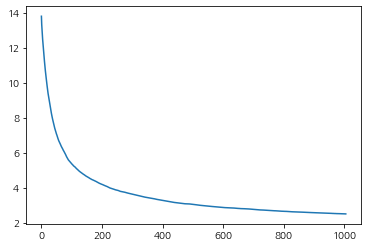

In [73]:
plt.plot(model.loss_val)

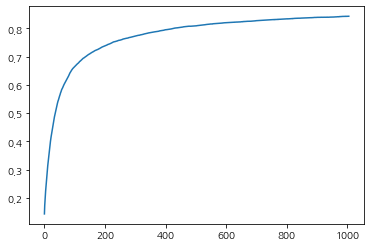

In [74]:
plt.plot(model.acc_val)

In [82]:
batch_size = 10000
X_train.shape[0]//batch_size
X_train.shape[0]%batch_size

2000

In [83]:
divmod(X_train.shape[0],batch_size)

(4, 2000)